# DBSCAN Algorithm:

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used in machine learning and data mining.

The main idea behind DBSCAN is to group together points that are close to each other in a dense region of the data space, while considering points that are isolated or in low-density areas as noise. The algorithm defines a dense region as a cluster if it has a minimum number of points (specified by the user) within a given radius.

In other words, DBSCAN starts with an arbitrary point and identifies its neighboring points that are within a specified radius. If the number of points in this neighborhood exceeds a given threshold, then this set of points is considered a cluster. DBSCAN then expands this cluster by identifying the neighbors of the points in the cluster until no more points can be added.

Points that are not part of any cluster are considered noise. The algorithm is robust to outliers and can handle clusters of arbitrary shape and size.

Overall, DBSCAN is a powerful tool for identifying structure in data and is widely used in various fields, including image processing, computer vision, and pattern recognition.

## Intuition: 

Let us imagine we collected height and weight from the bunch of people.

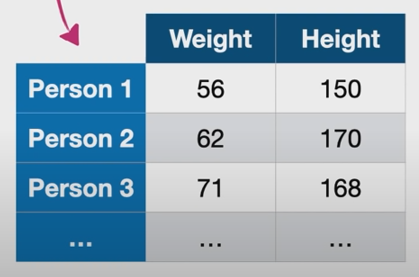

And then we plotted the people on a 2-dimensional graph like this:

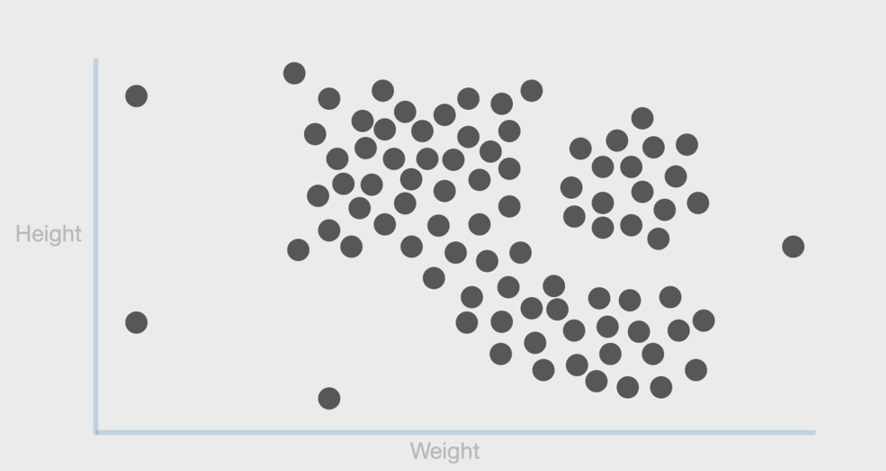

By eye, we can see 2 different clusters.

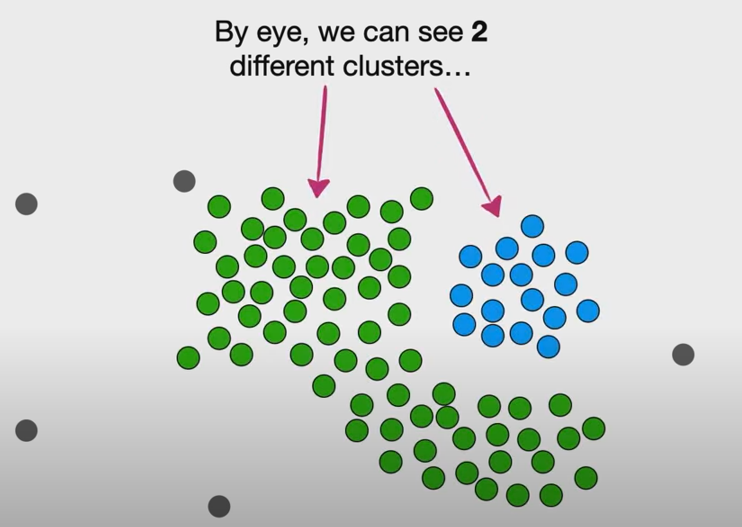

The people represented by the black dots are far from everyone else and they look like outliers.

**Note:** A relatively standard clustering method like K-Means might have difficulty identifying these two clusters. 

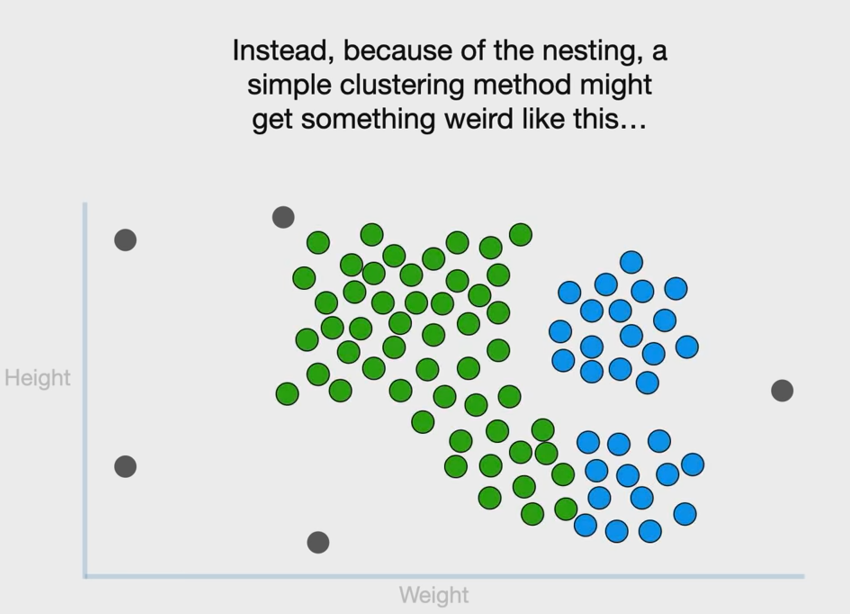

**So, we need a clustering algorithm that can handle a nested clusters. This should work perfectly in more that two dimensions.**

### DBSCAN is the answer for that!!!

DBSCAN uses the densities of the points to identify these clusters.

First, we can count the number of points close to each point. 

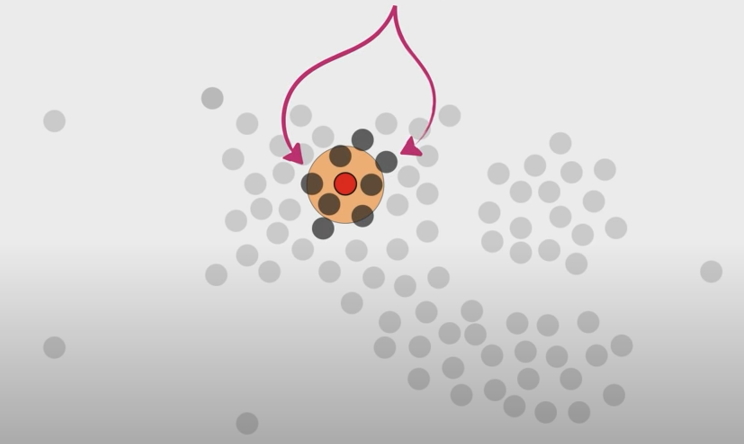

**Note:** The radius of the **Orange circle** is a hyperparameter. 

The circle drawn around the first red point overlaps the 8 other points. 

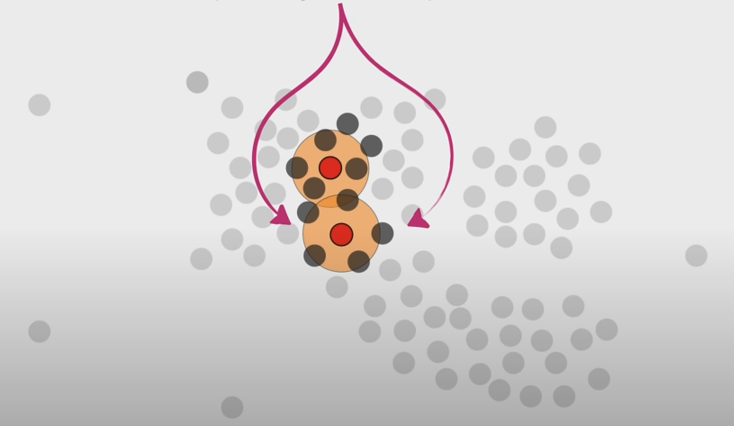

Similarly, the circle drawn around the second red point overlaps 5 other points partially. 

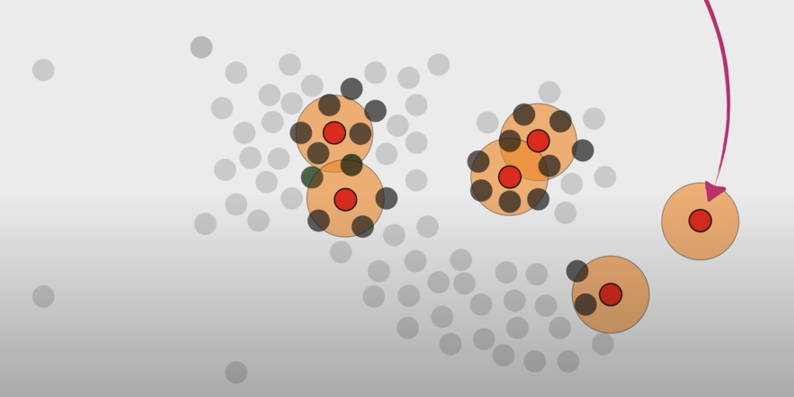

And so on...

For the sake of this example, let's define **Core Point** to be one that is close to at least 4 other points.

**Note:** selecting the number of points to be considered a core point is also a hyperparameter. 

Here, the leftmost points are the core points and the rightmost two points are **not** the core points.  

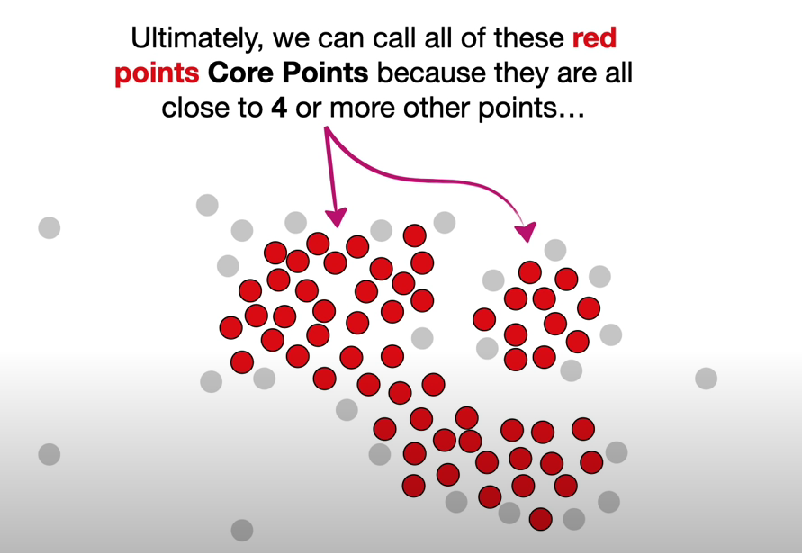

Then a point is picked and added to the cluster. The circle is drawn again and the points that classify as the core point is ultimately added to the first cluster. 

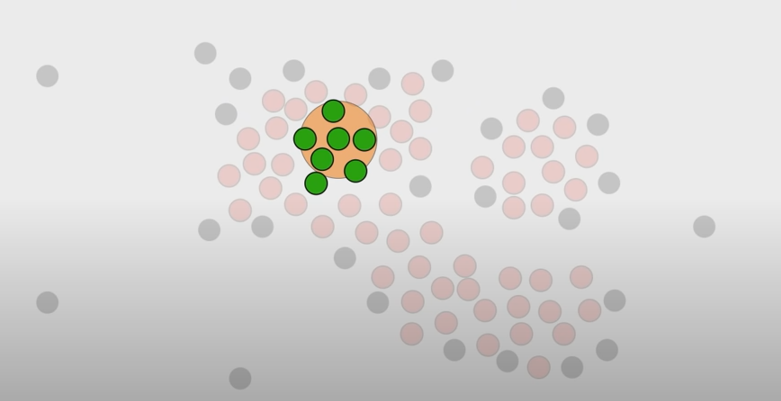

However, in this case, we add the core points only and leave the non-core point as it is. 

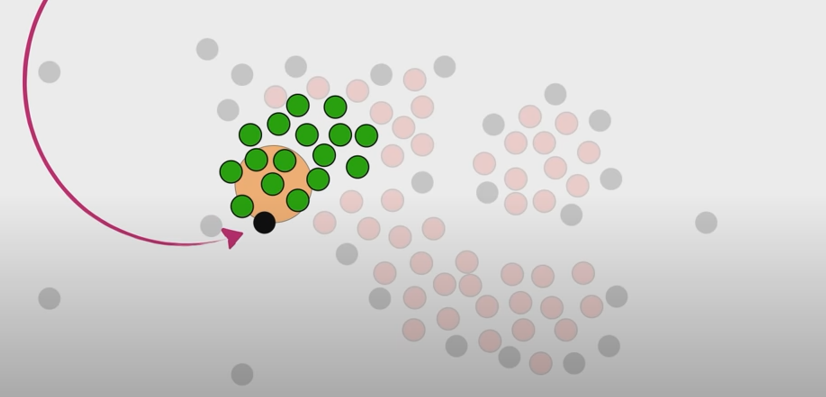


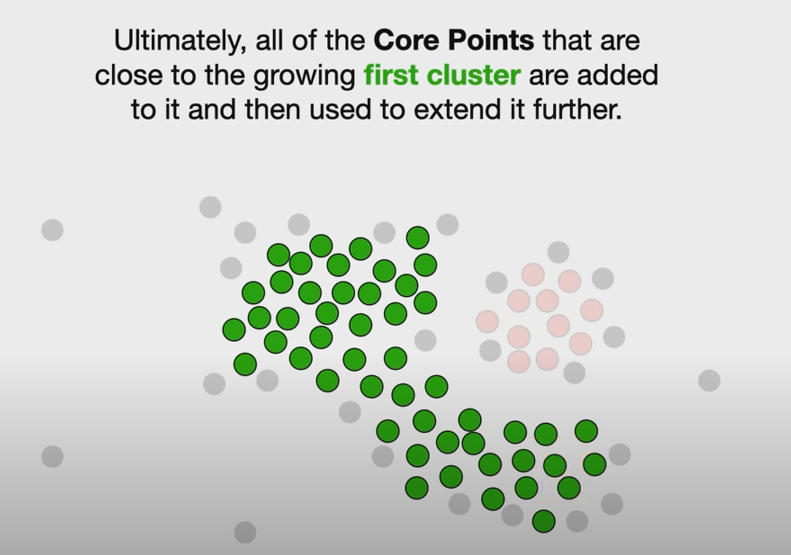

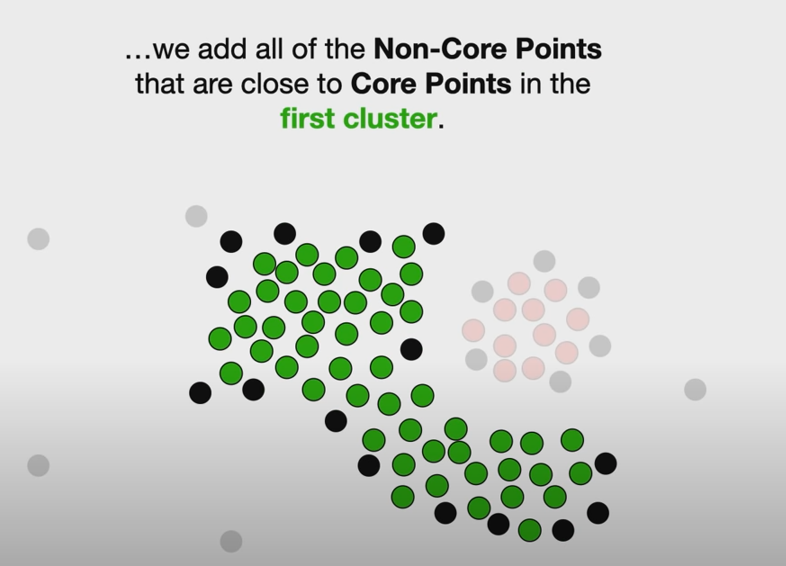

If those non-core points are closer to the first cluster then we assign them to the first cluster.

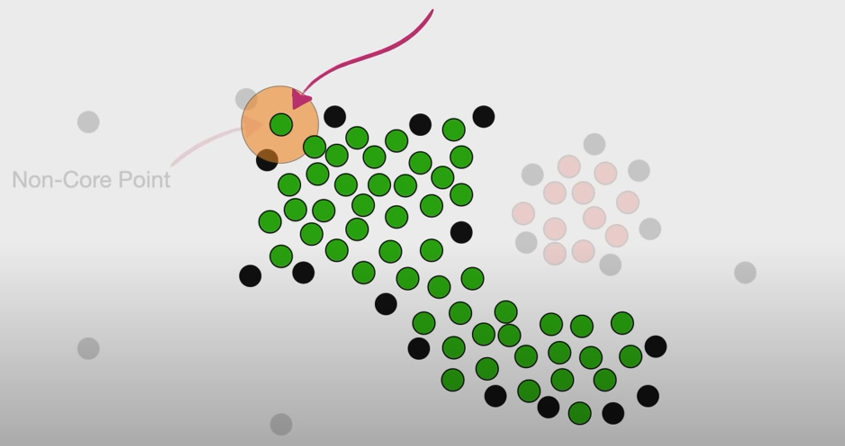

**But, how about the points near to the points which are freshly assigned to the cluster?**

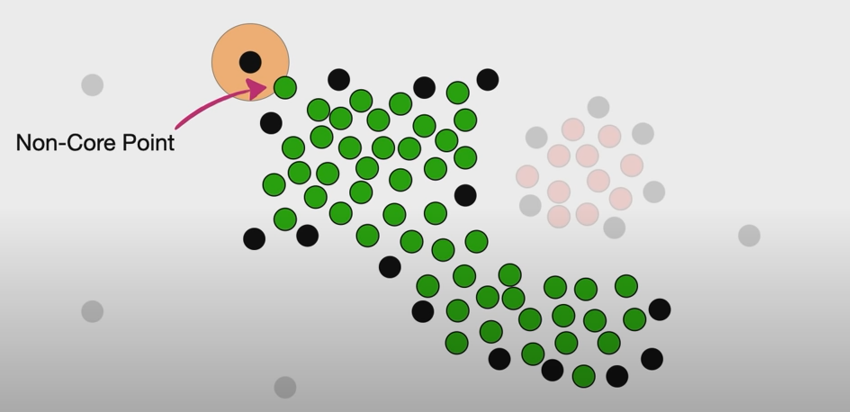

Unlike **Core Points, Non-core Points** can only join a cluster. They cannot extend it further.

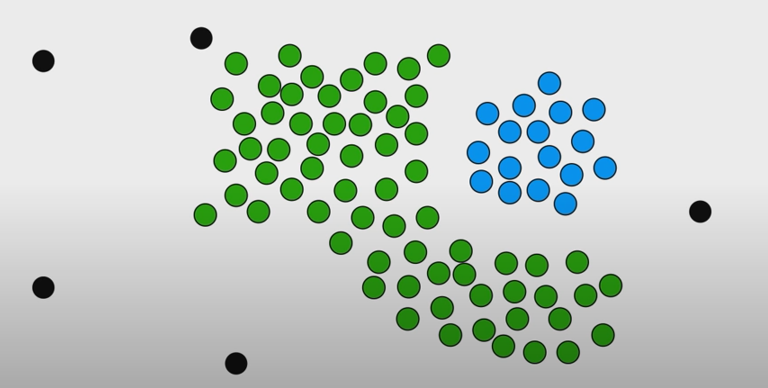

Finally, a new cluster is assigned and the above process is repeated until we get to the above end result. 

The non assigned points are simply called outliers.

## Now, let's get into coding. YAYYYYY!!!!!!!!!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'},inplace=True)

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


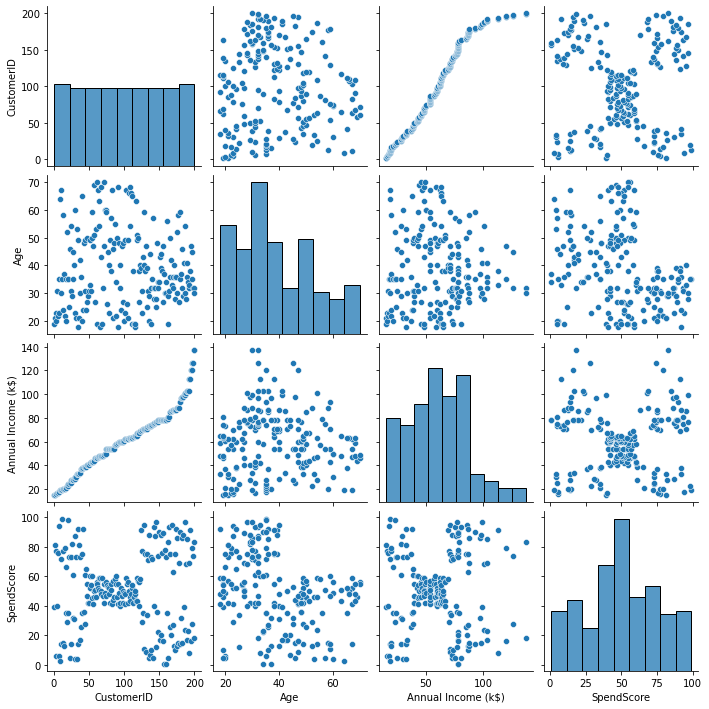

In [8]:
sns.pairplot(df)

**From the above diagram, we can say that the customer id is not correlated with income, it's not an useful feature so we can remove that.**

In [10]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [11]:
df.head()

,Gender,Age,Annual Income (k$),SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<AxesSubplot:>

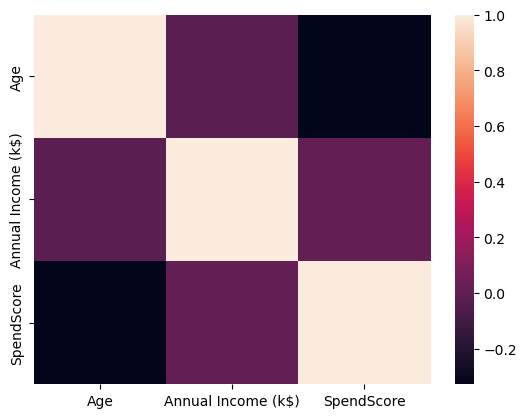

In [12]:
sns.heatmap(df.corr())

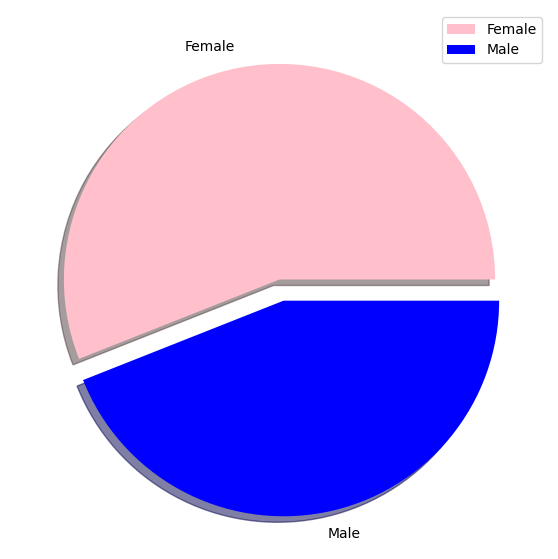

In [13]:
plt.figure(figsize=(7,7))
size=df['Gender'].value_counts()
label=['Female','Male']
color=['Pink','Blue']
explode=[0,0.1]
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()

**From the diagram, we can say that ladies visited this mall more then men**

C:\Users\ASUS\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '37'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '41'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  Text(29, 0, '47'),
  Text(30, 0, '48'),
  Text(31, 0, '49'),
  Text(32, 0, '50'),
  Text(33, 0, '51'),
  Text(34, 0, '52'),
  Text(35, 0, '53'),
  Text(36, 0, '54'),
  T

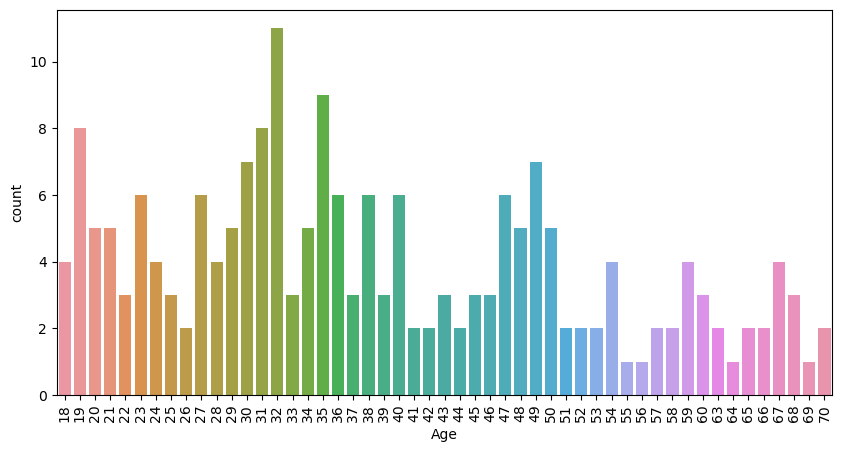

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(df['Age'])
plt.xticks(rotation=90)

**Peoples of age between 25 to 40 are mostly visiting mall than other age groups**

C:\Users\ASUS\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='SpendScore'>

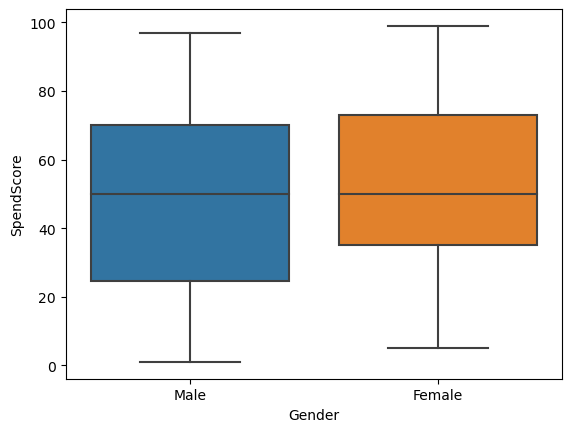

In [15]:
sns.boxplot(df['Gender'], df['SpendScore'])

**This diagram shows the mean spendscore of female and male. We can observe that the ladies spend more than men on this Mall.**

In [21]:
df.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\Users\ASUS\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

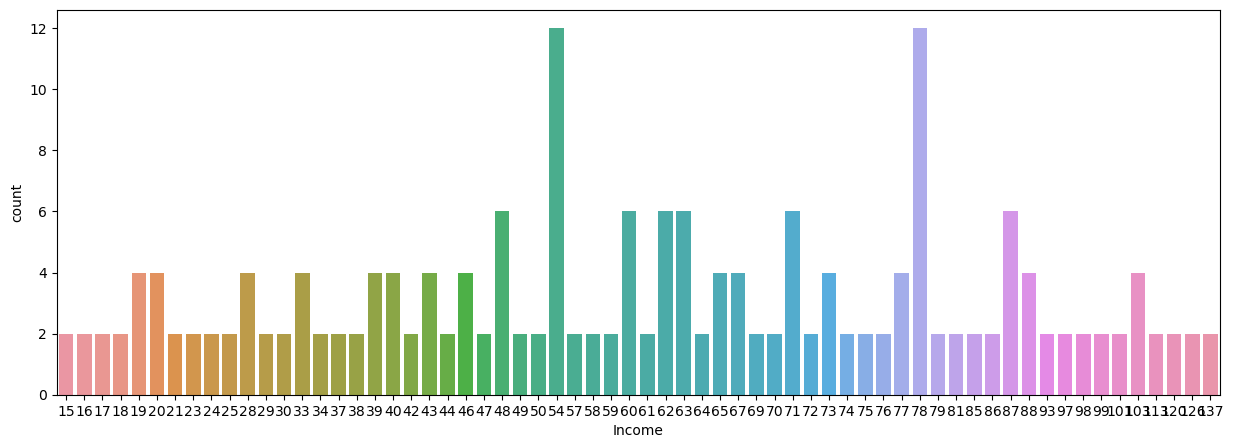

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(df['Income'])

**People having the salary of 54k and 78k are the frequent visitors of this Mall**

Text(0, 0.5, 'Spendscore')

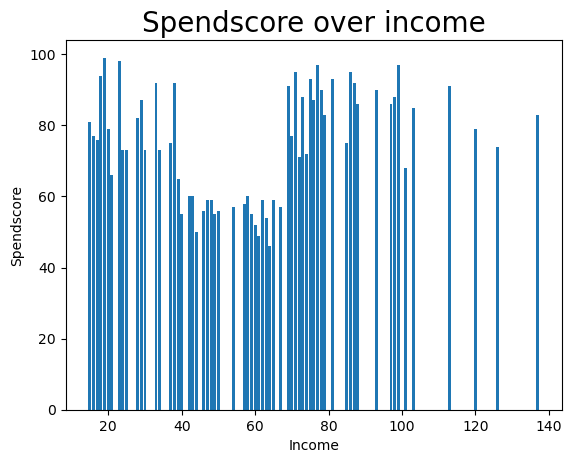

In [24]:
plt.bar(df['Income'],df['SpendScore'])
plt.title('Spendscore over income',fontsize=20)
plt.xlabel('Income')
plt.ylabel('Spendscore')

**Peoples of income in the range of 20k-40k and 70k-100k have the highest spend score**

### Using DBSCAN:

In [25]:
df.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [26]:
x = df.iloc[:,[2,3]].values

In [27]:
x.shape

(200, 2)

In [28]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=4, metric='euclidean')

In [29]:
model = dbscan.fit(x)

In [30]:
label = model.labels_

In [31]:
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [32]:
from sklearn import metrics

In [35]:
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 9


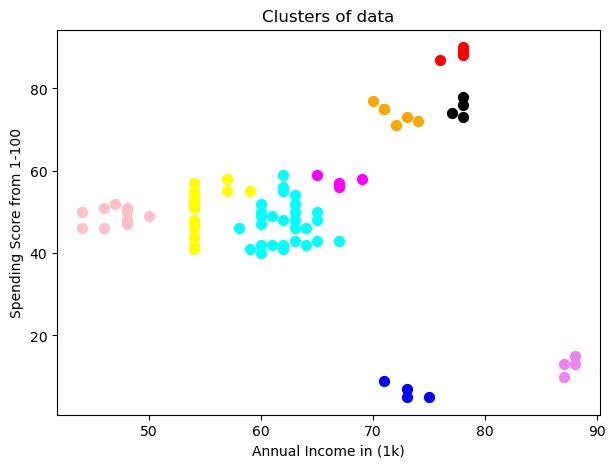

In [37]:
y_means = dbscan.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()